Продолжение задачи 3(ДЗ 2 и 3)

In [228]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xlrd

In [229]:
workbook = xlrd.open_workbook("C:\\Users\\Username\\Desktop\\strijov\\AirQualityUCI\\AirQualityUCI.xlsx","rb")
sheets = workbook.sheet_names()
X = [] #NMHC(GT)
Y = [] #PT08.S2(NHMC)
rownum = 1
for sheet_name in sheets:
    sh = workbook.sheet_by_name(sheet_name)
    for rownum in range(sh.nrows):
        row_valaues = sh.row_values(rownum)
        X.append(row_valaues[4])
        Y.append(row_valaues[6])
X=X[1:1000]
Y=Y[1:1000]

Ниже отбор незашумленных значений(отбор описан в файле main.ipynb, посвященному ДЗ 2 и 3)

In [230]:
Xwithout = [] #временные ряды без "неправильных" значений
Ywithout = [] 
i=0
list.clear(Xwithout)
list.clear(Ywithout)
for i in range(999):
    if X[i] > -200 and Y[i] > -200:
        Xwithout.append(X[i])
        Ywithout.append(Y[i])
        

Будем приближать ряды полиномом третьей степени

In [346]:
i= 0
Viborka = 699
X_data, Y_data = [],[]
for i in range(Viborka):
    X_data.append([])
    X_data[i].append(Xwithout[i])
    X_data[i].append(np.power(Xwithout[i],2))
    X_data[i].append(np.power(Xwithout[i],3))
    Y_data.append(Ywithout[i])

Адаптируем "типичный" в задачах о регрессии код к нашему случаю

In [347]:
import torch

In [348]:
from torch.autograd import Variable
w = torch.zeros(3, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(X_data/np.mean(X_data, axis=0), dtype=torch.float32)
y = torch.tensor(Y_data, dtype=torch.float32)

In [349]:
y = torch.tensor(Y_data, dtype=torch.float32)
iters = 40
losses = np.zeros(iters)

for i in range(iters):

    y_pred = torch.matmul(x, w) + b
    loss = torch.mean( (y_pred - y)**2 )
    loss.backward()
    losses[i] = loss.item()

    w.data -= 0.05 * w.grad.data
    b.data -= 0.05 * b.grad.data
    
    #zero gradients
    w.grad.data.zero_()
    b.grad.data.zero_()

In [350]:
w = torch.zeros(3, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

noise = np.random.normal(loc=0.0, scale=1.0, size= (Viborka, 3))

x = torch.tensor(X_data/np.mean(X_data, axis=0)+noise, dtype=torch.float32)
y = torch.tensor(Y_data, dtype=torch.float32)

In [351]:
losses_noisy_1 = np.zeros(iters)

for i in range(iters):

    y_pred = torch.matmul(x, w) + b
    loss = torch.mean( (y_pred - y)**2 )
    loss.backward()
    losses_noisy_1[i] = loss.item()
    w.data -= 0.05 * w.grad.data
    b.data -= 0.05 * b.grad.data
    
    #zero gradients
    w.grad.data.zero_()
    b.grad.data.zero_()

In [352]:
w = torch.zeros(3, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

noise = np.random.normal(loc=0.0, scale=2.0, size=(Viborka, 3))

x = torch.tensor(X_data/np.mean(X_data, axis=0)+noise, dtype=torch.float32)
y = torch.tensor(Y_data, dtype=torch.float32)

In [353]:
losses_noisy_2 = np.zeros(iters)

for i in range(iters):

    y_pred = torch.matmul(x, w) + b
    loss = torch.mean( (y_pred - y)**2 )
    loss.backward()
    losses_noisy_2[i] = loss.item()
    w.data -= 0.05 * w.grad.data
    b.data -= 0.05 * b.grad.data
    
    #zero gradients
    w.grad.data.zero_()
    b.grad.data.zero_()

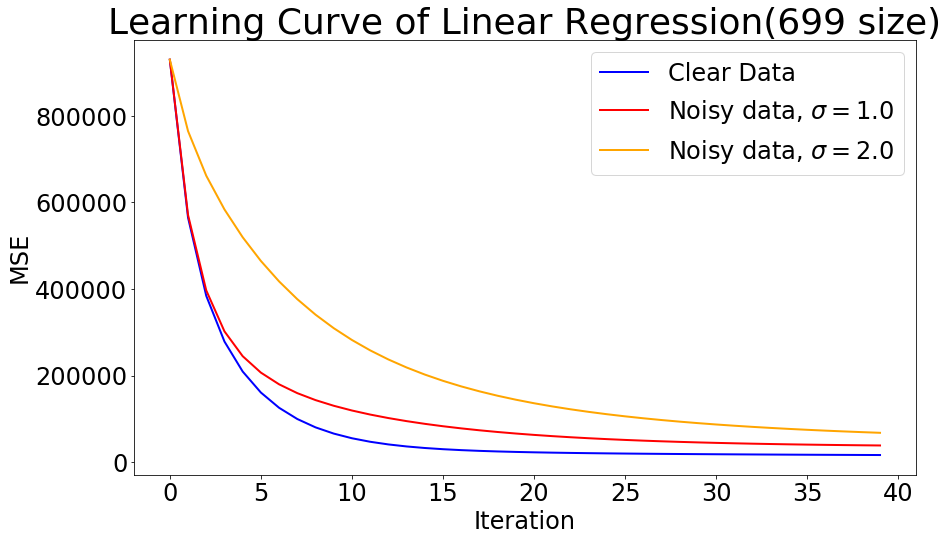

In [354]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24
plt.figure(figsize=(14,8))

x_range = range(iters)
line_clear = plt.plot(x_range, losses, color='blue')
line_noisy_1 = plt.plot(x_range, losses_noisy_1, color='red')
line_noisy_2 = plt.plot(x_range, losses_noisy_2, color='orange')

plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Learning Curve of Linear Regression(699 size)")
plt.legend(('Clear Data', 'Noisy data, $\sigma = 1.0$', 'Noisy data, $\sigma = 2.0$'))

plt.savefig('LearningCurve699.png')